SOLUTION OF QUESTION STATEMENT IS GIVEN BELOW 
I TRIED USING RANDOM FOREST ALGORITHM TO SOLVE THIS PROBLEM.

IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

LOADING DATA 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


PRINTING DATA HEAD 

In [3]:
problem = pd.read_csv("amazon_alexa.tsv", delimiter='\t')
problem.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


PREDICTING TAIL OF DATA SET 

In [4]:
problem.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


EDA ON OUR GIVEN DATA SET FOR BETTER UNDERSTANDING

In [5]:
problem.isnull()

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


KNOW OUR DATA SET BETTER 

In [6]:
problem.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
problem.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
problem.groupby('rating').count()

,date,variation,verified_reviews,feedback
rating,,,,
1,161,161,161,161
2,96,96,96,96
3,152,152,152,152
4,455,455,455,455
5,2286,2286,2286,2286


In [9]:
problem.groupby('feedback').count()

,rating,date,variation,verified_reviews
feedback,,,,
0,257,257,257,257
1,2893,2893,2893,2893


In [10]:
problem.query('feedback=="1" & rating>2')

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [11]:
problem.query('feedback=="0" & rating>1')

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
187,2,29-Jul-18,Charcoal Fabric,Really disappointed Alexa has to be plug-in to...,0
205,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0
...,...,...,...,...,...
2945,2,30-Jul-18,Black Dot,When you think about it this really doesn’t do...,0
2964,2,30-Jul-18,Black Dot,Ask it to play Motown radio on Pandora and it ...,0
3010,2,30-Jul-18,Black Dot,Sound is terrible. Cannot pair with echo to pl...,0
3039,2,30-Jul-18,Black Dot,Weak sound. Compared to the Google Home Mini t...,0


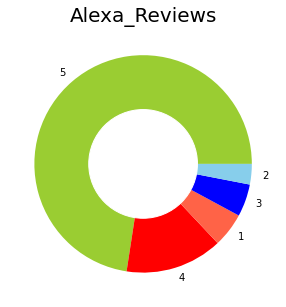

In [12]:
ratings = problem["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["yellowgreen", "red", 'tomato', "blue", "skyblue"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Alexa_Reviews", fontsize=20)
plt.show()

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
generation=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', problem['verified_reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    generation.append(review)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(generation).toarray()
y=problem.iloc[:,4].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
y_pred.shape

(630,)

In [22]:
from sklearn.metrics import mean_absolute_error
avg_error = mean_absolute_error(y_pred,y_test)
print(avg_error)

0.05714285714285714


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9428571428571428


In [24]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.9696969696969697


PREDICTION PART 

In [25]:
texts = ["Amazon Alexa is the best product. It gives me all the updates on news and new songs. I can also control my devices from Alexa. Really Happy. ",
         "I tried Alexa . But it did not work for me. The speaker voice is too low and it does not identify Indian accent. I think Amazon can do better. Buying alexa is waste of money",]
text_features = cv.transform(texts)
predictions = classifier.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(predicted))
    print("")

"Amazon Alexa is the best product. It gives me all the updates on news and new songs. I can also control my devices from Alexa. Really Happy. "
  - Predicted as: '1'

"I tried Alexa . But it did not work for me. The speaker voice is too low and it does not identify Indian accent. I think Amazon can do better. Buying alexa is waste of money"
  - Predicted as: '1'

